<a href="https://colab.research.google.com/github/jsebastianquiroga/IMAGE_VIDEO_PROCESSING_PUJ/blob/main/presentaciones/fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Procesamiento de imágenes y video.</strong></h1>
<h2> Para: Carlos Alberto Parra Rodriguez.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Leonardo García.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Transformada de Fourier</title>
</head>
<body>
    <h1>La Transformada de Fourier</h1>
    <p>La Transformada de Fourier es una herramienta matemática esencial en el procesamiento de imágenes, permitiendo descomponer imágenes en sus frecuencias constituyentes. En este notebook, exploraremos su aplicación en imágenes digitales a través de los siguientes pasos:</p>
    <ol>
        <li><strong>Importación de Librerías y Visualización de la Imagen:</strong> Cargaremos las bibliotecas necesarias y visualizaremos una imagen descargada desde Google Drive.</li>
        <li><strong>Aplicación de la Transformada de Fourier:</strong> Convertiremos la imagen a escala de grises, aplicaremos la Transformada de Fourier 2D y visualizaremos el resultado en el dominio de frecuencia.</li>
        <li><strong>Manipulación en el Dominio de Frecuencia:</strong> Experimentaremos con máscaras y filtrado en el dominio de frecuencia, y observaremos cómo estas operaciones afectan la imagen en el dominio espacial.</li>
        <li><strong>Compresión de Imágenes usando la Transformada de Fourier:</strong> Exploraremos cómo la Transformada de Fourier puede ser utilizada para comprimir imágenes, reteniendo solo un porcentaje de los coeficientes más significativos y visualizando los resultados.</li>
    </ol>
    <p>Con las visualizaciones y experimentos, obtendremos una comprensión clara de cómo la Transformada de Fourier puede ser una herramienta poderosa en el procesamiento de imágenes.</p>
</body>
</html>


<body>
    <h2>Paso 1: Importación de Librerías y Visualización de la Imagen</h2>
    <div class="highlight">
        <p>En este primer paso, comenzaremos por importar las bibliotecas esenciales que nos permitirán trabajar con imágenes y realizar operaciones matemáticas. Una vez hecho esto, descargaremos una imagen desde Google Drive y la visualizaremos para tener una referencia clara de con qué estamos trabajando.</p>
    </div>
</body>
</html>


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

Downloading...
From: https://drive.google.com/uc?id=1qk89d0D4jTV99bk5C0qEPoAMa3E7IqvW
To: /content/against_the_light.png
100%|██████████| 23.9k/23.9k [00:00<00:00, 38.3MB/s]


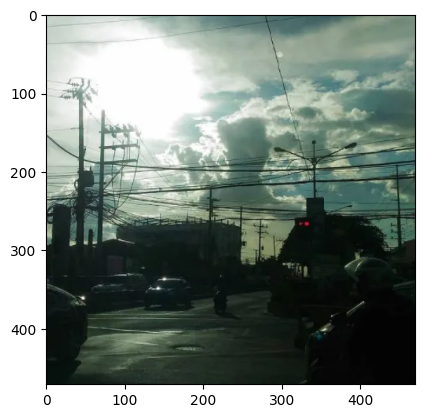

In [2]:
import gdown
import cv2
from matplotlib import pyplot as plt

# Download the image from Google Drive
url = 'https://drive.google.com/uc?id=1qk89d0D4jTV99bk5C0qEPoAMa3E7IqvW'
output = 'against_the_light.png'
gdown.download(url, output, quiet=False)

# Read and display the image
dark_image = cv2.imread('against_the_light.png', cv2.IMREAD_COLOR)
dark_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB)
plt.imshow(dark_image)
plt.show()


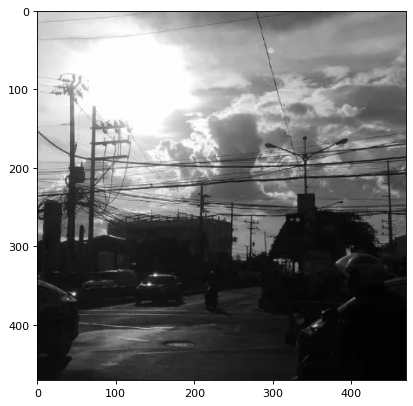

In [3]:
dark_image_grey = cv2.cvtColor(dark_image, cv2.COLOR_RGB2GRAY)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')


<body>
    <h2>Paso 2: Aplicación de la Transformada de Fourier</h2>
    <div class="highlight">
        <p>En este segundo paso, nos adentraremos en el núcleo del procesamiento de imágenes utilizando la Transformada de Fourier. Convertiremos nuestra imagen a escala de grises, lo que facilitará la aplicación de la Transformada de Fourier 2D. Una vez aplicada, visualizaremos el resultado en el dominio de frecuencia, lo que nos permitirá observar las frecuencias y patrones presentes en la imagen original.</p>
    </div>
</body>
</html>


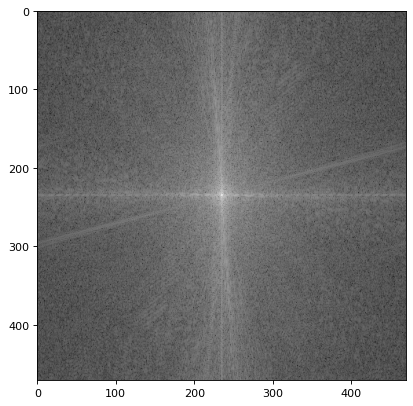

In [4]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

En la imagen podemos ver dos distorsiones muy claras. Las líneas verticales y horizontales blancas se refieren a los elementos horizontales y verticales nítidos de la imagen. Veamos qué pasa si enmascaramos uno de ellos.


<body>
    <h2>Paso 3: Manipulación en el Dominio de Frecuencia</h2>
    <div class="highlight">
        <p>En este tercer y último paso, experimentaremos con la manipulación directa de la imagen en el dominio de frecuencia. Utilizaremos máscaras y técnicas de filtrado para alterar ciertas frecuencias y luego invertiremos la transformada para regresar al dominio espacial. A través de este proceso, observaremos cómo las intervenciones en el dominio de frecuencia pueden tener efectos significativos y a veces sorprendentes en la imagen original.</p>
    </div>
</body>
</html>


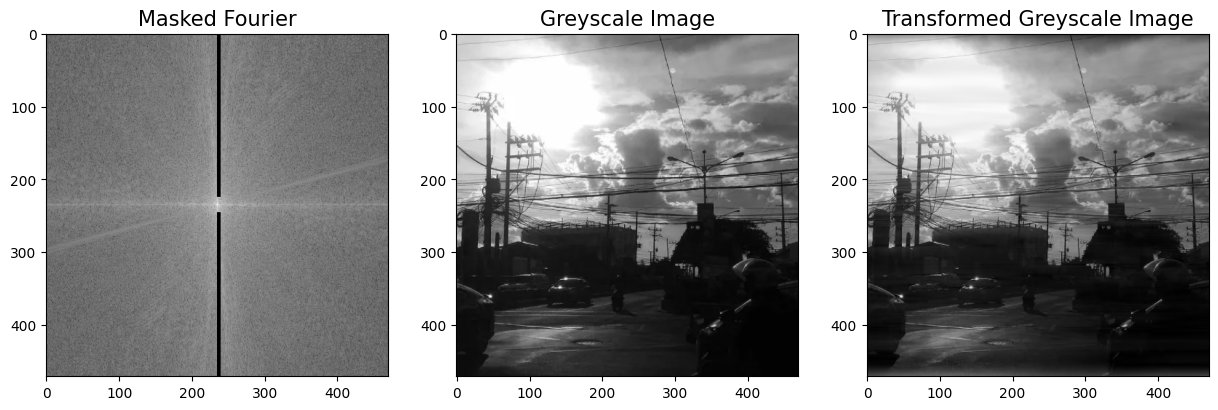

In [5]:
def fourier_masker_ver(image, i):
    f_size = 15
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_grey))
    dark_image_grey_fourier[:225, 235:240] = i
    dark_image_grey_fourier[-225:,235:240] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image_grey, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size)

fourier_masker_ver(dark_image, 1)

Podemos ver que los cables de alimentación horizontales se han reducido significativamente en tamaño. Como experimento interesante, veamos qué pasaría si en su lugar enmascaráramos la línea horizontal.

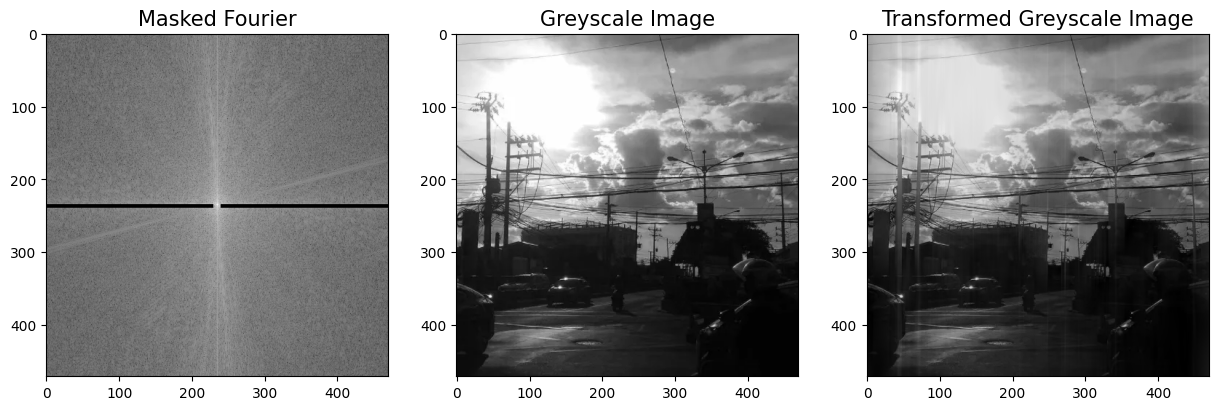

In [6]:
def fourier_masker_hor(image, i):
    f_size = 15
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(image_grey))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(image_grey, cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size)
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', fontsize = f_size)

fourier_masker_hor(dark_image, 1)

Podemos ver que todos los aspectos verticales de la imagen han sido emborronados. Esto es muy notorio en los postes eléctricos. Aunque útil en algunos entornos, esto claramente no es útil aquí.

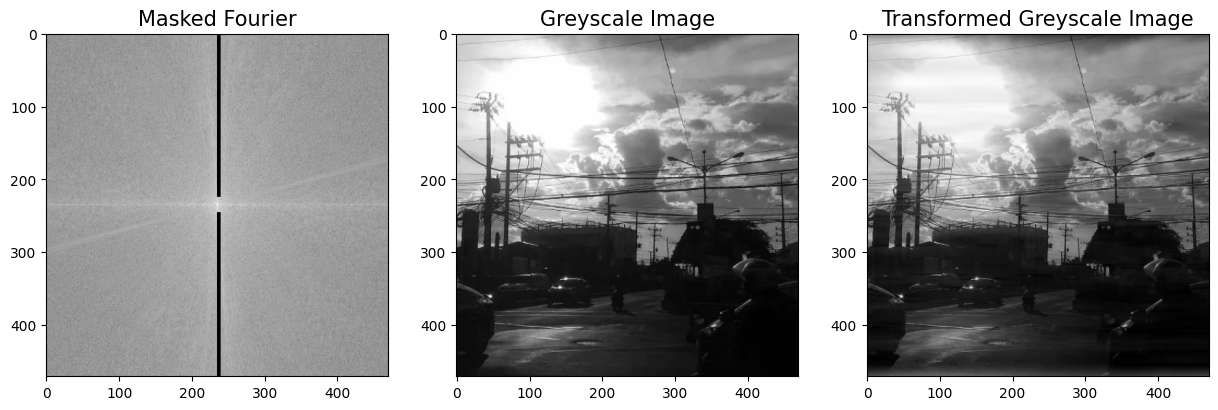

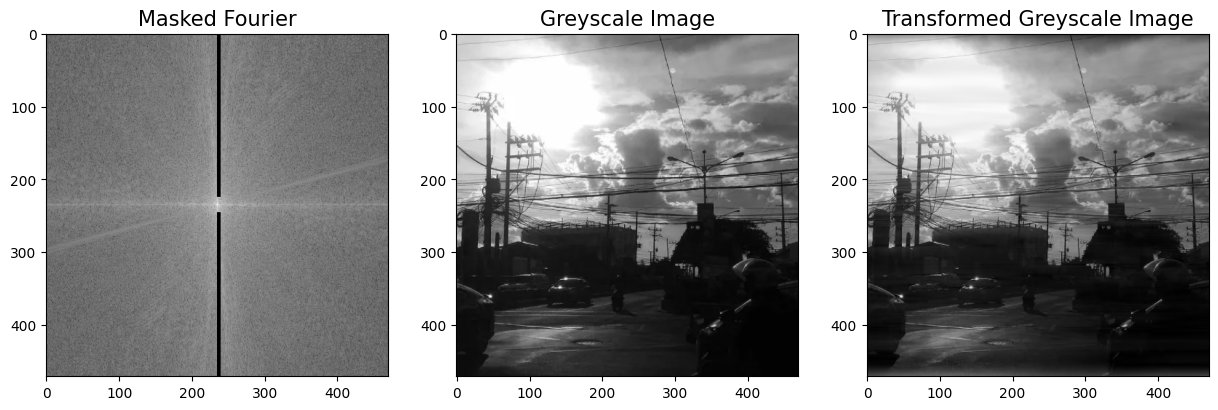

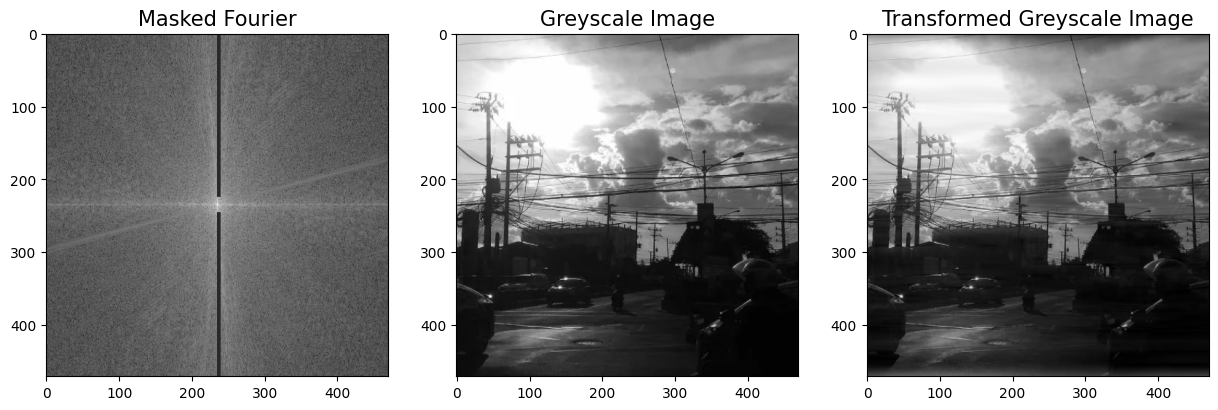

In [7]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)

fourier_iterator(dark_image, [0.001, 1, 100])

Podemos ver que la disminución del valor casi no tiene efecto sobre la imagen original, sin embargo, el aumento del valor parece oscurecer la imagen original. Como prácticamente no hay diferencia entre el valor más pequeño y 1, vamos a ceñirnos a 1 por simplicidad.

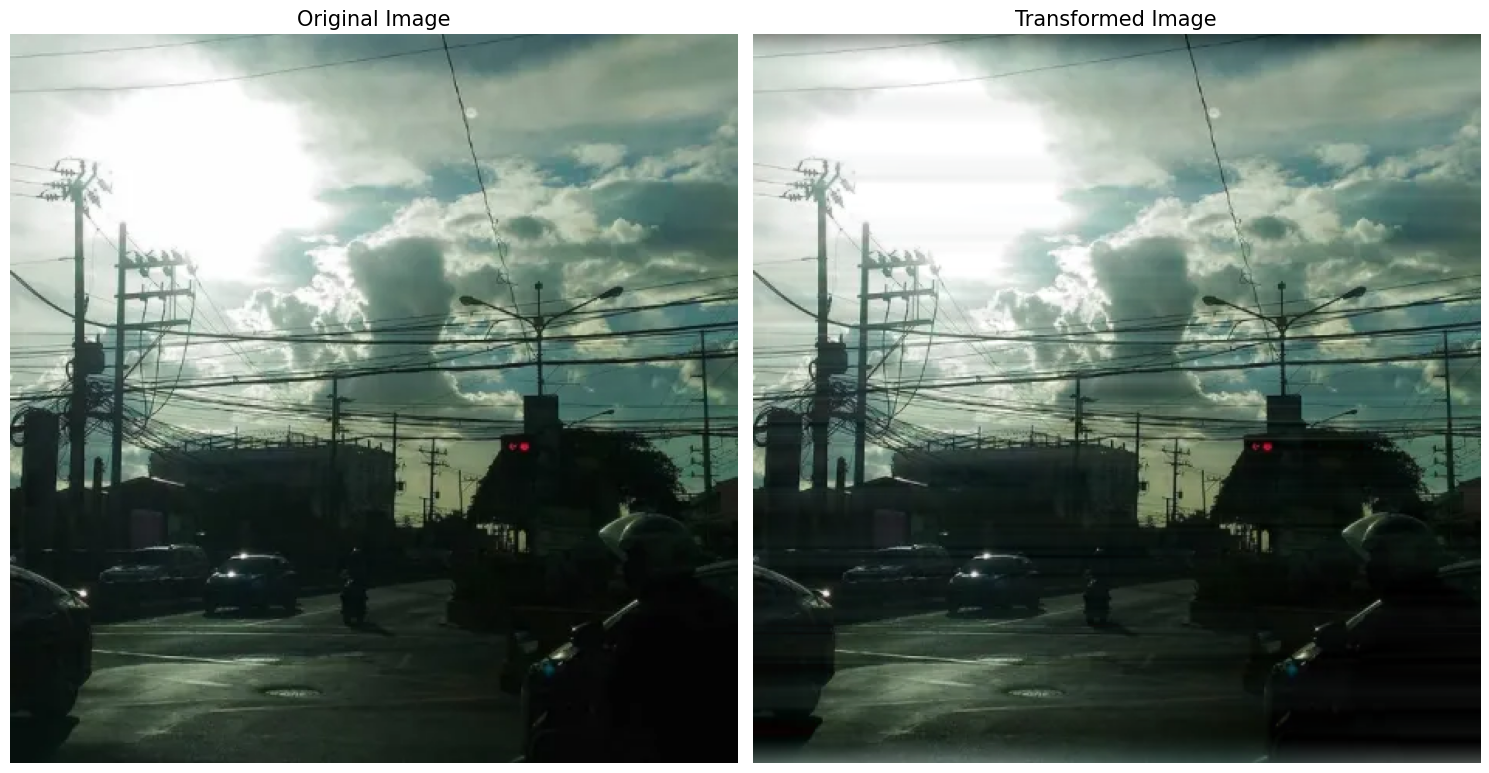

In [8]:
def fourier_transform_rgb(image):
    f_size = 15
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))

    final_image = np.dstack([transformed_channels[0].astype(int),
                             transformed_channels[1].astype(int),
                             transformed_channels[2].astype(int)])

    fig, ax = plt.subplots(1, 2, figsize=(15,15))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()

    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()

    fig.tight_layout()

fourier_transform_rgb(dark_image)

Podemos ver que los cables de alimentación horizontales se han reducido considerablemente, mientras que el resto de la imagen permanece prácticamente intacta. Esto demuestra cómo podemos introducir cambios sutiles en una imagen mediante la transformación de Fourier.


<body>
    <h2>Paso 4: Compresión de Imágenes usando la Transformada de Fourier</h2>
    <div class="highlight">
        <p>En este cuarto paso, exploraremos cómo la Transformada de Fourier puede ser utilizada para comprimir imágenes. La idea principal es que, tras aplicar la Transformada de Fourier a una imagen, muchos de los coeficientes resultantes son pequeños y pueden ser descartados sin una pérdida significativa de información. Al retener solo un porcentaje de los coeficientes más significativos, podemos reducir el tamaño de la imagen. Luego, visualizaremos la imagen comprimida y compararemos su calidad y tamaño con la imagen original, observando cómo diferentes niveles de compresión afectan la calidad visual de la imagen.</p>
    </div>
</body>
</html>

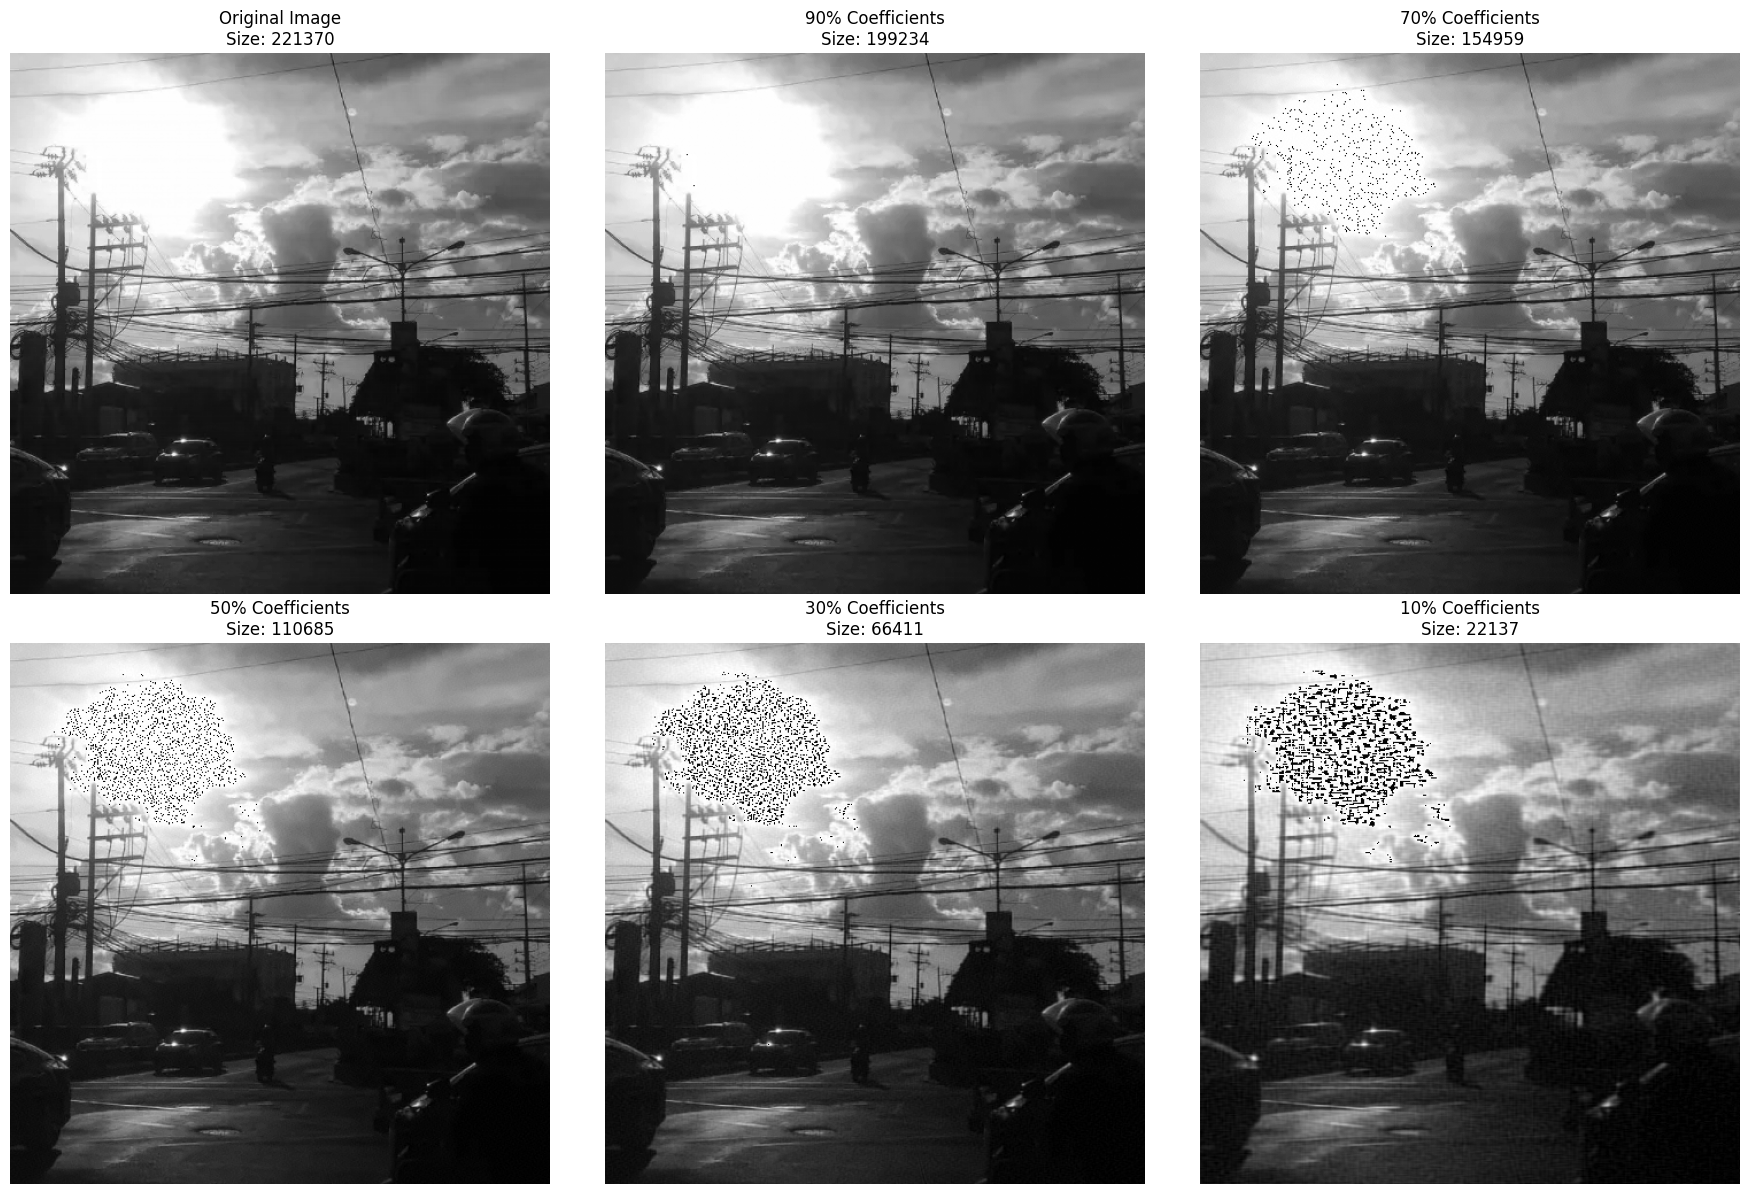

In [23]:
def compress_image(image, percentage=1.0):
    """
    Compresses the given image using Fourier Transform.

    :param image: Input image to be compressed.
    :param percentage: Percentage of coefficients to keep. Default is 100%.
    :return: Compressed image, size based on non-zero Fourier coefficients.
    """
    # Convert the image to grayscale
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply the 2D Fourier Transform
    image_fourier = np.fft.fftshift(np.fft.fft2(image_grey))

    # Flatten the Fourier coefficients and sort by magnitude
    flattened = np.abs(image_fourier).flatten()
    sorted_indices = np.argsort(flattened)

    # Zero out the smallest coefficients if percentage is less than 1
    if percentage < 1.0:
        num_to_zero = int((1 - percentage) * len(flattened))
        smallest_indices = sorted_indices[:num_to_zero]
        for index in smallest_indices:
            x, y = np.unravel_index(index, image_fourier.shape)
            image_fourier[x, y] = 0

    # Compute the size based on non-zero Fourier coefficients
    size = np.count_nonzero(image_fourier)

    # Apply the inverse 2D Fourier Transform
    compressed_image = np.fft.ifft2(np.fft.ifftshift(image_fourier))
    return np.abs(compressed_image).astype(np.uint8), size

# Display the original image first
plt.figure(figsize=(18, 12))

original_image, original_size = compress_image(dark_image, 1.0)
plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title(f'Original Image\nSize: {original_size}')
plt.axis('off')

# Loop through different percentages and display the compressed image for each
percentages = np.arange(0.9, 0.0, -0.2)
for idx, percentage in enumerate(percentages, start=2):  # Start from 2 since the first slot is for the original image
    compressed_dark_image, size = compress_image(dark_image, percentage)
    plt.subplot(2, 3, idx)
    plt.imshow(compressed_dark_image, cmap='gray')
    plt.title(f'{percentage*100:.0f}% Coefficients\nSize: {size}')
    plt.axis('off')

plt.tight_layout()
plt.show()